In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
test.shape

(14910, 51)

In [15]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [16]:
# посмотрим типы данных и их заполняемость

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [18]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [19]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее'}

MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}

GEN_INDUSTRY
{nan, 'Страхование', 'Развлечения/Искусство', 'Сборочные производства', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Строительство', 'Управляющая компания', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Банк/Финансы', 'Информационные технологии', 'Торговля', 'Энергетика', 'Недвижимость', 'Сельское хозяйство', 'Наука', 'Логистика', 'Государственная служба', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Коммунальное хоз-во/Дорожные службы', 'ЧОП/Детективная д-ть', 'Туризм'}

GEN_TITLE
{na

In [20]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [21]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [22]:
# причина же что использовалась запятая для разделения не целой части числа

In [23]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [24]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [25]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее'}

MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}

GEN_INDUSTRY
{nan, 'Страхование', 'Развлечения/Искусство', 'Сборочные производства', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Строительство', 'Управляющая компания', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Банк/Финансы', 'Информационные технологии', 'Торговля', 'Энергетика', 'Недвижимость', 'Сельское хозяйство', 'Наука', 'Логистика', 'Государственная служба', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Коммунальное хоз-во/Дорожные службы', 'ЧОП/Детективная д-ть', 'Туризм'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [26]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
all_data.loc[:, all_data.dtypes != object].info() #to see if there are empty numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 38 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL                30133 non-null int64
OWN_AUTO                      30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
HS_PRESENCE_FL                30133 non-null int64
COT_PRESENCE_FL       

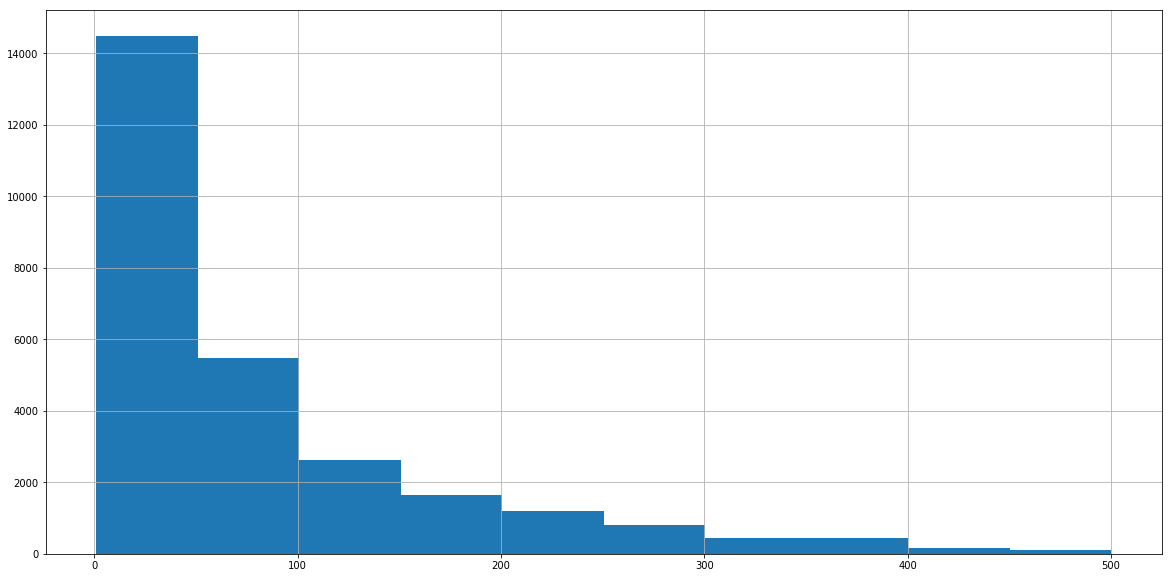

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
all_data['WORK_TIME'][all_data['WORK_TIME'] <= 500].hist(ax=ax)

In [28]:
nanValue = all_data['WORK_TIME'][all_data['WORK_TIME'].notnull()].quantile()
nanValue

48.0

In [29]:
#it looks like it's better to take QUANTILE value to replace NaN
all_data['WORK_TIME'][all_data['WORK_TIME'].isnull()] = nanValue

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


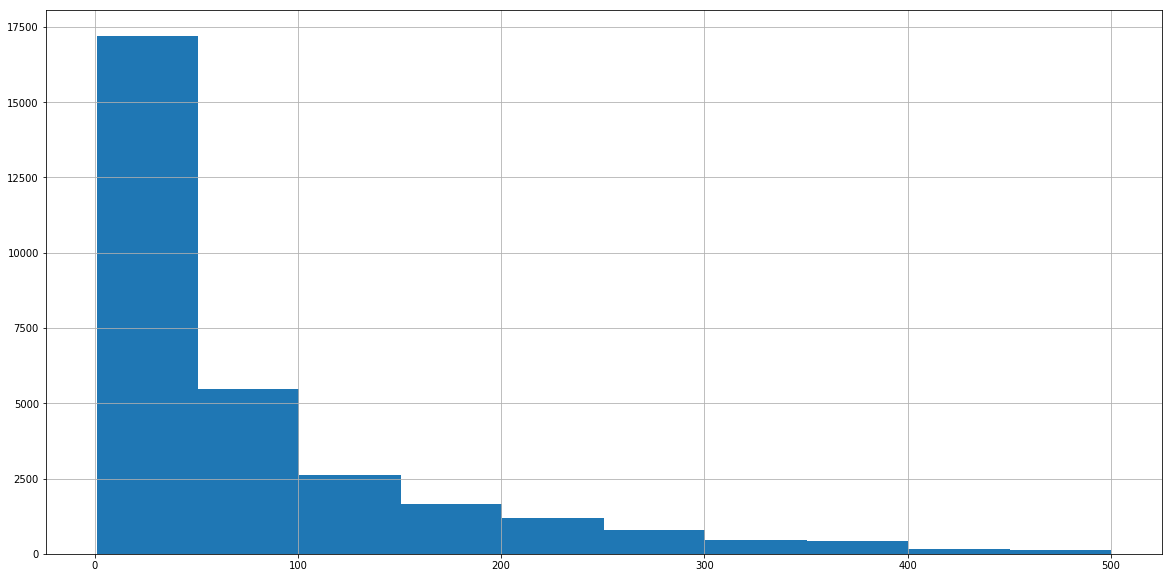

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
all_data['WORK_TIME'][all_data['WORK_TIME'] <= 500].hist(ax=ax)

In [31]:
all_data['PREVIOUS_CARD_NUM_UTILIZED'].unique()

array([ nan,   1.,   2.])

In [32]:
#so it is actually categorical
column = 'PREVIOUS_CARD_NUM_UTILIZED'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [33]:
# Как поступить со строковыми переменными?

# Ваш код :-)

In [34]:
#for EDUCATION
column = 'EDUCATION'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [35]:
#for MARITAL_STATUS
column = 'MARITAL_STATUS'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [36]:
#for GEN_INDUSTRY
column = 'GEN_INDUSTRY'
other_name = 'Другие сферы'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()
#replaces NaN value with 'other' value
all_data[column + '_CTG'] = all_data[column + '_CTG'].replace(-1, tmpCtg.get_indexer_for([other_name])[0])

In [37]:
#for GEN_TITLE
column = 'GEN_TITLE'
other_name = 'Другое'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()
#replaces NaN value with 'other' value
all_data[column + '_CTG'] = all_data[column + '_CTG'].replace(-1, tmpCtg.get_indexer_for([other_name])[0])

In [38]:
#for ORG_TP_STATE
column = 'ORG_TP_STATE'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [39]:
#for ORG_TP_FCAPITAL
column = 'ORG_TP_FCAPITAL'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [40]:
#for JOB_DIR
column = 'JOB_DIR'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [41]:
#for FAMILY_INCOME
column = 'FAMILY_INCOME'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [42]:
#for REG_ADDRESS_PROVINCE
column = 'REG_ADDRESS_PROVINCE'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [43]:
#for FACT_ADDRESS_PROVINCE
column = 'FACT_ADDRESS_PROVINCE'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [44]:
#for POSTAL_ADDRESS_PROVINCE
column = 'POSTAL_ADDRESS_PROVINCE'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [45]:
#for TP_PROVINCE
column = 'TP_PROVINCE'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [46]:
#for REGION_NM
column = 'REGION_NM'
tmpCtg = all_data[column].astype('category').cat.categories
all_data[column + '_CTG'] = tmpCtg.get_indexer_for(all_data[column]).tolist()

In [47]:
# В итоге должны получиться данные без пропусков и только числовые
all_data_num = all_data.loc[:, all_data.dtypes != 'object']
all_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                   30133 non-null int64
AGE                            30133 non-null int64
SOCSTATUS_WORK_FL              30133 non-null int64
SOCSTATUS_PENS_FL              30133 non-null int64
GENDER                         30133 non-null int64
CHILD_TOTAL                    30133 non-null int64
DEPENDANTS                     30133 non-null int64
PERSONAL_INCOME                30133 non-null float64
REG_FACT_FL                    30133 non-null int64
FACT_POST_FL                   30133 non-null int64
REG_POST_FL                    30133 non-null int64
REG_FACT_POST_FL               30133 non-null int64
REG_FACT_POST_TP_FL            30133 non-null int64
FL_PRESENCE_FL                 30133 non-null int64
OWN_AUTO                       30133 non-null int64
AUTO_RUS_FL                    30133 non-null int64
HS_PRESENCE_FL                 30133 non-null int64
COT_P

In [48]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
all_data_num.reset_index(drop=True)
trainEx = all_data_num.loc[all_data_num['AGREEMENT_RK'].isin(train['AGREEMENT_RK'])].drop('AGREEMENT_RK', axis=1)
testEx = all_data_num.loc[all_data_num['AGREEMENT_RK'].isin(test['AGREEMENT_RK'])].drop('AGREEMENT_RK', axis=1)

In [49]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(trainEx, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
trainEx.shape

(15223, 50)

In [51]:
y.shape

(15223,)

In [52]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
model_dtc = DecisionTreeClassifier(random_state=42)
model_rfc = RandomForestClassifier(random_state=42, n_estimators=15)
model_lr = LogisticRegression(random_state=42, max_iter=70)

In [53]:
model_dtc.fit(X_train, y_train)
dtc_p = model_dtc.predict(X_test)
dtc_pp = model_dtc.predict_proba(X_test)
model_dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [54]:
model_rfc.fit(X_train, y_train)
rfc_p = model_rfc.predict(X_test)
rfc_pp = model_rfc.predict_proba(X_test)
model_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
model_lr.fit(X_train, y_train)
lr_p = model_lr.predict(X_test)
lr_pp = model_lr.predict_proba(X_test)
model_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=70, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions

In [56]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Metrics for DecisionTreeClassifier

In [58]:
print('accuracy', accuracy_score(y_test, dtc_p))
print('precision', precision_score(y_test, dtc_p))
print('recall', recall_score(y_test, dtc_p))
print('f1', f1_score(y_test, dtc_p))

accuracy 0.78454127436
precision 0.162204724409
recall 0.185585585586
f1 0.173109243697


##### Metrics for RandomForestClassifier

In [59]:
print('accuracy', accuracy_score(y_test, rfc_p))
print('precision', precision_score(y_test, rfc_p))
print('recall', recall_score(y_test, rfc_p))
print('f1', f1_score(y_test, rfc_p))

accuracy 0.875629516094
precision 0.275862068966
recall 0.0144144144144
f1 0.027397260274


##### Metrics for LogisticRegression

In [60]:
print('accuracy', accuracy_score(y_test, lr_p))
print('precision', precision_score(y_test, lr_p))
print('recall', recall_score(y_test, lr_p))
print('f1', f1_score(y_test, lr_p))

accuracy 0.87760017517
precision 0.25
recall 0.0036036036036
f1 0.00710479573712


#### Visualization

In [61]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)

In [62]:
from sklearn.metrics import precision_recall_curve

In [63]:
precisionDTC, recallDTC, thresholdsDTC = precision_recall_curve(y_test, dtc_pp[:,1])
precisionRFC, recallRFC, thresholdsRFC = precision_recall_curve(y_test, rfc_pp[:,1])
precisionLR, recallLR, thresholdsLR = precision_recall_curve(y_test, lr_pp[:,1])

In [64]:
recallDTC

array([ 1.        ,  0.18558559,  0.        ])

In [65]:
precisionDTC

array([ 0.12152398,  0.16220472,  1.        ])

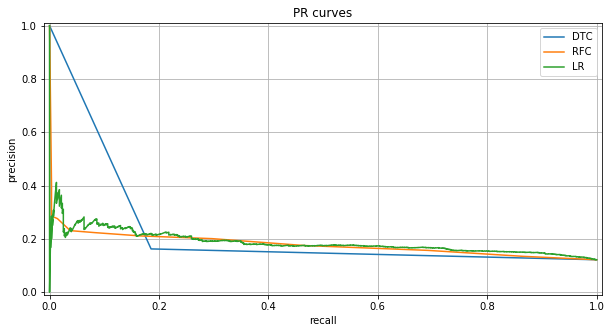

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(recallDTC, precisionDTC)
plt.plot(recallRFC, precisionRFC)
plt.plot(recallLR, precisionLR)
plt.ylabel('precision')
plt.xlabel('recall')
plt.grid(True)
plt.title('PR curves')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['DTC', 'RFC', 'LR'])

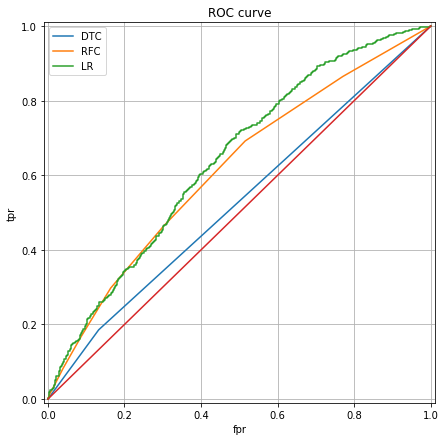

In [67]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fprDTC, tprDTC, tshdDTC = roc_curve(y_test, dtc_pp[:,1])
fprRFC, tprRFC, tshdRFC = roc_curve(y_test, rfc_pp[:,1])
fprLR, tprLR, tshdLR = roc_curve(y_test, lr_pp[:,1])

plt.figure(figsize=(7, 7))
plt.plot(fprDTC, tprDTC)
plt.plot(fprRFC, tprRFC)
plt.plot(fprLR, tprLR)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['DTC', 'RFC', 'LR'])

In [68]:
print('ROC_AUC score for DecisionTreeClassifier: ', roc_auc_score(y_test, dtc_pp[:,1]))
print('ROC_AUC score for RandomForestClassifier: ', roc_auc_score(y_test, rfc_pp[:,1]))
print('ROC_AUC score for LogisticRegression: ', roc_auc_score(y_test, lr_pp[:,1]))

ROC_AUC score for DecisionTreeClassifier:  0.526491696083
ROC_AUC score for RandomForestClassifier:  0.613975191542
ROC_AUC score for LogisticRegression:  0.640731858479


In [69]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)

In [70]:
from scipy import stats

In [71]:
stats.describe(cross_val_score(model_dtc, trainEx, y, scoring='roc_auc', cv=10))

DescribeResult(nobs=10, minmax=(0.50121744719245553, 0.55316186073722506), mean=0.52210009203086871, variance=0.00030204722195076848, skewness=0.4669564913941528, kurtosis=-0.9724381875160928)

In [72]:
stats.describe(cross_val_score(model_rfc, trainEx, y, scoring='roc_auc', cv=10))

DescribeResult(nobs=10, minmax=(0.56877443649292814, 0.6320961103489191), mean=0.60334271556233898, variance=0.00050615506130596876, skewness=-0.10453049706375477, kurtosis=-1.1262454733688212)

In [73]:
stats.describe(cross_val_score(model_lr, trainEx, y, scoring='roc_auc', cv=10))

DescribeResult(nobs=10, minmax=(0.61603239933915899, 0.68015128480848386), mean=0.64596443159181249, variance=0.00035038819434407727, skewness=-0.045080502486998845, kurtosis=-0.3162204956595156)

The best model is LogisticRegression as it has highest mean value and variance is OK

In [74]:
best = model_lr

In [82]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
y_hat = best.predict_proba(testEx)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
